In [245]:
#import important libraries
import pandas as pd
import numpy as np
import re
#for barchat interactive. plotly is effecient library for interactive visualization
import matplotlib.pyplot as plt

#for normalization
from sklearn.preprocessing import MinMaxScaler

In [246]:
# read dataset & print it
df = pd.read_csv(r'D:\Courses\Prodigy Intern\Task1\API_SP.POP.TOTL_DS2_en_csv_v2_85.csv')
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [247]:
#Information about data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

#### Found that some column has 1 : 3  null values
##### so that we can drop 

In [248]:
df = df.dropna()
df.shape

(264, 67)

#### Before droping null rows, these was 2 countries that don't have any information from year 1960 - 1989 or from 1990 - 2022

In [249]:
#droping duplicates
df = df.drop_duplicates()
df.shape

(264, 67)

It seems that there is no duplicates in the dataset

### Statistics about data

In [250]:
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.172712e+08,1.188807e+08,1.210511e+08,1.237333e+08,1.264378e+08,1.291813e+08,1.320404e+08,1.348980e+08,1.378358e+08,1.408789e+08,...,2.938527e+08,2.977431e+08,3.016035e+08,3.054625e+08,3.093274e+08,3.131284e+08,3.168480e+08,3.204506e+08,3.237252e+08,3.266870e+08
std,3.695439e+08,3.740897e+08,3.808061e+08,3.895039e+08,3.982439e+08,4.071153e+08,4.164504e+08,4.257424e+08,4.353218e+08,4.452927e+08,...,9.201957e+08,9.316030e+08,9.428624e+08,9.540529e+08,9.652520e+08,9.761545e+08,9.867244e+08,9.968233e+08,1.005941e+09,1.013893e+09
min,2.646000e+03,2.888000e+03,3.171000e+03,3.481000e+03,3.811000e+03,4.161000e+03,4.531000e+03,4.930000e+03,5.354000e+03,5.646000e+03,...,1.069400e+04,1.089900e+04,1.087700e+04,1.085200e+04,1.082800e+04,1.086500e+04,1.095600e+04,1.106900e+04,1.120400e+04,1.131200e+04
25%,5.132212e+05,5.231345e+05,5.337595e+05,5.449288e+05,5.566630e+05,5.651150e+05,5.691470e+05,5.773872e+05,5.832700e+05,5.875942e+05,...,1.633497e+06,1.670147e+06,1.706191e+06,1.700500e+06,1.712904e+06,1.723991e+06,1.729916e+06,1.741612e+06,1.748145e+06,1.740216e+06
50%,3.757486e+06,3.887144e+06,4.023896e+06,4.139356e+06,4.224612e+06,4.277636e+06,4.331825e+06,4.385700e+06,4.450934e+06,4.530800e+06,...,1.015331e+07,1.034159e+07,1.038195e+07,1.042652e+07,1.044737e+07,1.042760e+07,1.055977e+07,1.065204e+07,1.053749e+07,1.057953e+07
75%,2.670606e+07,2.748694e+07,2.830289e+07,2.914708e+07,3.001684e+07,3.084892e+07,3.163010e+07,3.209247e+07,3.249927e+07,3.277149e+07,...,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.161352e+07,6.304870e+07,6.444782e+07,6.586616e+07
max,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,3.398480e+09,3.468371e+09,3.540164e+09,3.614573e+09,...,7.229303e+09,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09


#### Which countries have the highest population growth rate?

1. Calculate the average growth rate for each country over a specific period (last 10 years)
2.  plot them on the bar chart
##### This will allow you to identify countries with the highest and lowest growth rates.

In [251]:
# Calculate the average growth rate for each country over the last 10 years (2012-2022)
df['Average Growth Rate'] = df.loc[:, '2012':'2022'].mean(axis=1)

In [252]:
# Sort the DataFrame by average growth rate in descending order
df_sorted = df.sort_values(by = "Average Growth Rate", ascending = False)

In [253]:
# Select the top N countries with the highest average growth rate
top_countries = df_sorted.head(10)
top_countries

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Average Growth Rate
259,World,WLD,"Population, total",SP.POP.TOTL,3.031474e+09,3.072422e+09,3.126850e+09,3.193429e+09,3.260442e+09,3.328209e+09,...,7.317040e+09,7.403850e+09,7.490415e+09,7.576442e+09,7.660371e+09,7.741775e+09,7.820206e+09,7.888306e+09,7.950947e+09,7.565458e+09
103,IDA & IBRD total,IBT,"Population, total",SP.POP.TOTL,2.297972e+09,2.329504e+09,2.374276e+09,2.431314e+09,2.488809e+09,2.547220e+09,...,6.160290e+09,6.240231e+09,6.319805e+09,6.399653e+09,6.477695e+09,6.553978e+09,6.627317e+09,6.695488e+09,6.754030e+09,6.391493e+09
140,Low & middle income,LMY,"Population, total",SP.POP.TOTL,2.243179e+09,2.274050e+09,2.318173e+09,2.374537e+09,2.431355e+09,2.489219e+09,...,6.081161e+09,6.160876e+09,6.240319e+09,6.320334e+09,6.399037e+09,6.476093e+09,6.549996e+09,6.618837e+09,6.678280e+09,6.313223e+09
156,Middle income,MIC,"Population, total",SP.POP.TOTL,2.107416e+09,2.135116e+09,2.175940e+09,2.228877e+09,2.282094e+09,2.336193e+09,...,5.513458e+09,5.578703e+09,5.642636e+09,5.706387e+09,5.768171e+09,5.827338e+09,5.882943e+09,5.933587e+09,5.974552e+09,5.695860e+09
102,IBRD only,IBD,"Population, total",SP.POP.TOTL,1.904347e+09,1.926043e+09,1.960606e+09,2.007061e+09,2.053555e+09,2.100537e+09,...,4.616585e+09,4.663653e+09,4.709004e+09,4.753252e+09,4.794556e+09,4.832929e+09,4.867092e+09,4.895373e+09,4.913887e+09,4.739389e+09
62,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.794615e+08,1.004319e+09,1.029962e+09,1.056327e+09,1.083430e+09,1.110603e+09,...,3.121656e+09,3.165215e+09,3.208370e+09,3.250753e+09,3.292897e+09,3.334562e+09,3.374384e+09,3.411268e+09,3.447399e+09,3.247279e+09
139,Lower middle income,LMC,"Population, total",SP.POP.TOTL,9.058328e+08,9.276212e+08,9.499254e+08,9.728725e+08,9.963528e+08,1.020044e+09,...,2.858673e+09,2.902878e+09,2.946639e+09,2.990173e+09,3.033153e+09,3.075312e+09,3.117226e+09,3.157462e+09,3.190184e+09,2.986846e+09
249,Upper middle income,UMC,"Population, total",SP.POP.TOTL,1.201583e+09,1.207494e+09,1.226014e+09,1.256005e+09,1.285741e+09,1.316149e+09,...,2.654785e+09,2.675825e+09,2.695996e+09,2.716215e+09,2.735018e+09,2.752026e+09,2.765717e+09,2.776125e+09,2.784368e+09,2.709014e+09
63,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.043334e+09,1.045203e+09,1.059600e+09,1.085399e+09,1.110819e+09,1.136927e+09,...,2.278232e+09,2.294507e+09,2.310722e+09,2.327133e+09,2.341384e+09,2.353857e+09,2.363934e+09,2.370190e+09,2.375162e+09,2.320016e+09
142,Late-demographic dividend,LTE,"Population, total",SP.POP.TOTL,1.095549e+09,1.097729e+09,1.112143e+09,1.137972e+09,1.163377e+09,1.189486e+09,...,2.244043e+09,2.258406e+09,2.272340e+09,2.286628e+09,2.298988e+09,2.309492e+09,2.317278e+09,2.322606e+09,2.325543e+09,2.279654e+09


##### It is discovered the data isn't just about country names, but it also includes income figures for certain regions like the Middle East. Therefore, we decided to first separate the data representing countries and their populations from the rest of the rows that represent other aspects to address some questions related to this topic.

##### The first row, labeled "World," represents the chronological tracking of the population census for the world. so let's drop it for now and put it in new variable "world"

## Preprocessing data 

1. separate the data contain income and related titles in a new dataset

In [254]:
keywords = ['income', 'IDA & IBRD', 'IDA', 'IBRD', 'demographic dividend', 'demographic','Central', 'dividend', '&', 'Least developed countries',
            'poor', 'high', 'developed', 'Union', 'Arab World','South', 'North','East','West','situation','members', 'area', 'Sub-','World']

# Create a mask to filter rows containing any of the keywords
mask = df['Country Name'].str.contains('|'.join(keywords), case=False)

Drop the extracted data from the real data to reduce memory usage

In [255]:
df.drop(df[mask].index, inplace=True)
df.shape

(214, 68)

## visualize the distribution of a continuous variable.

Now let's answer the 1st question useing visualization
### Which countries have the highest population growth rate?

In [256]:
df = df.sort_values(by = "Average Growth Rate", ascending = False)

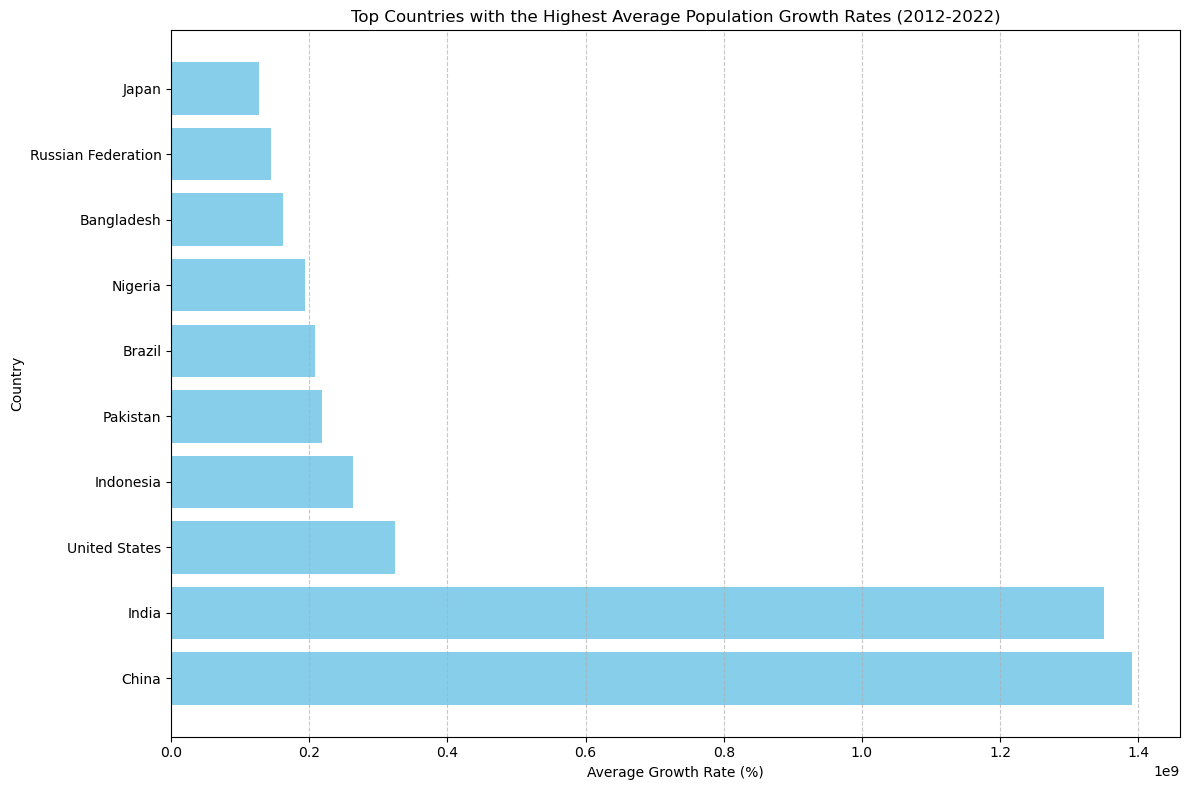

In [257]:
plt.figure(figsize=(12, 8))
plt.barh(df['Country Name'].head(10), df['Average Growth Rate'].head(10), color='skyblue')
plt.xlabel('Average Growth Rate (%)')
plt.ylabel('Country')
plt.title('Top Countries with the Highest Average Population Growth Rates (2012-2022)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### How has the global population changed over the past few decades?

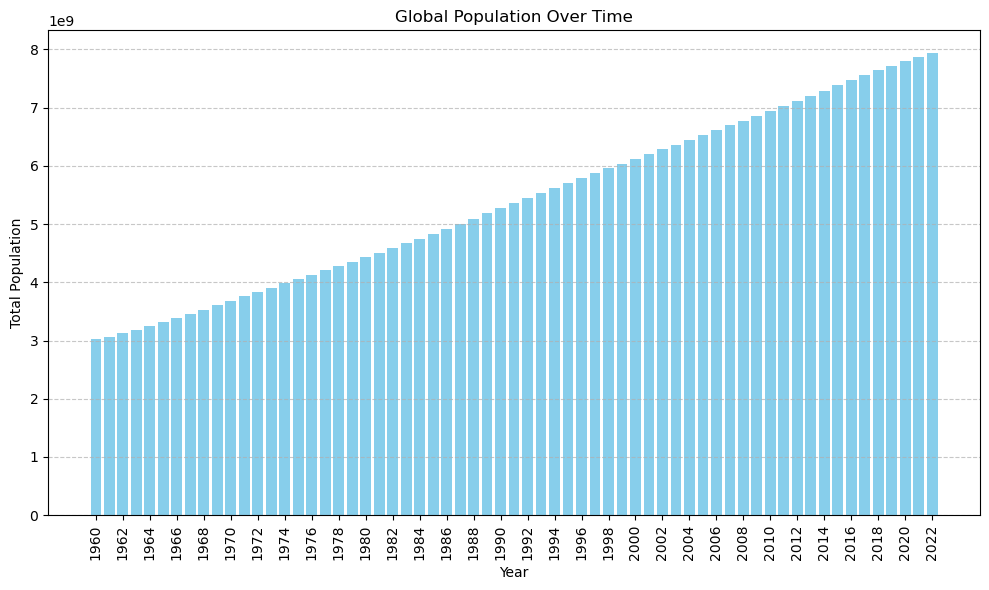

In [258]:
#years and corresponding population data
years = df.columns[4:-1]  # Assuming population data starts from the 5th column
total_population = df.iloc[:, 4:-1].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, total_population, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Global Population Over Time')
plt.xticks(rotation=90)
plt.gca().set_xticks(years[::2])  # Show every 5th year
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()